In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('disease.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# To check the missing values in the dataset
data.isnull().values.any()

False

In [10]:
#Replace 0 to NaN
d = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [11]:
# Find the number of Missing values
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Handling the Missing values by replacing NaN to median


In [12]:
#Replace NaN to mean value to explore dataset
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Data visualization

In [13]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

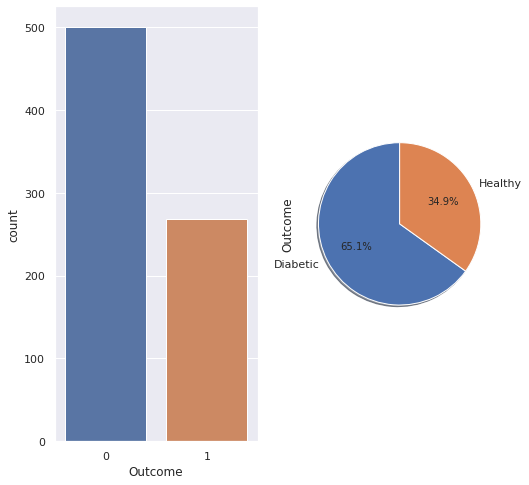

In [14]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(data['Outcome'],ax=ax1[0])

labels = 'Diabetic', 'Healthy'

data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

## Plots to analyze the Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b0c87f50>,
      dtype=object)

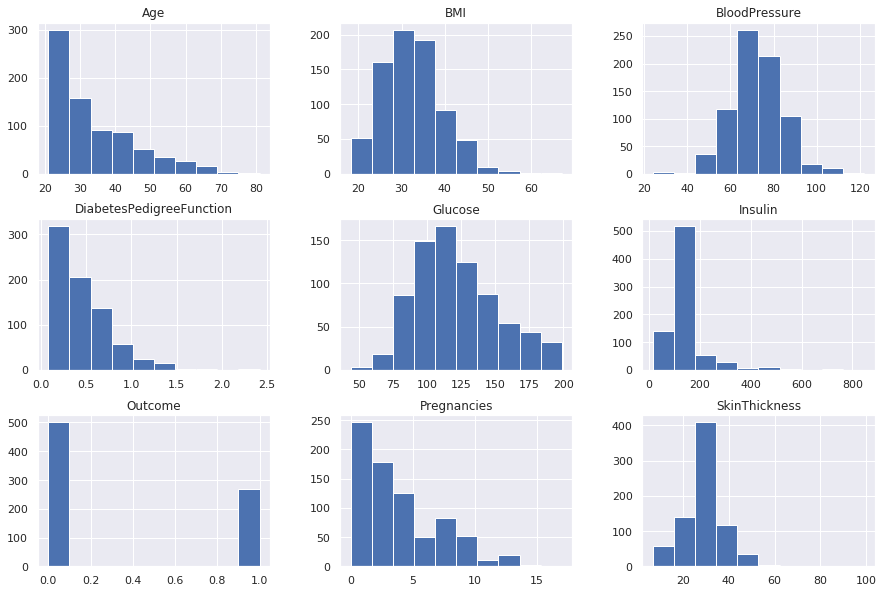

In [15]:
# Histogram 
data.hist(figsize=(15,10))

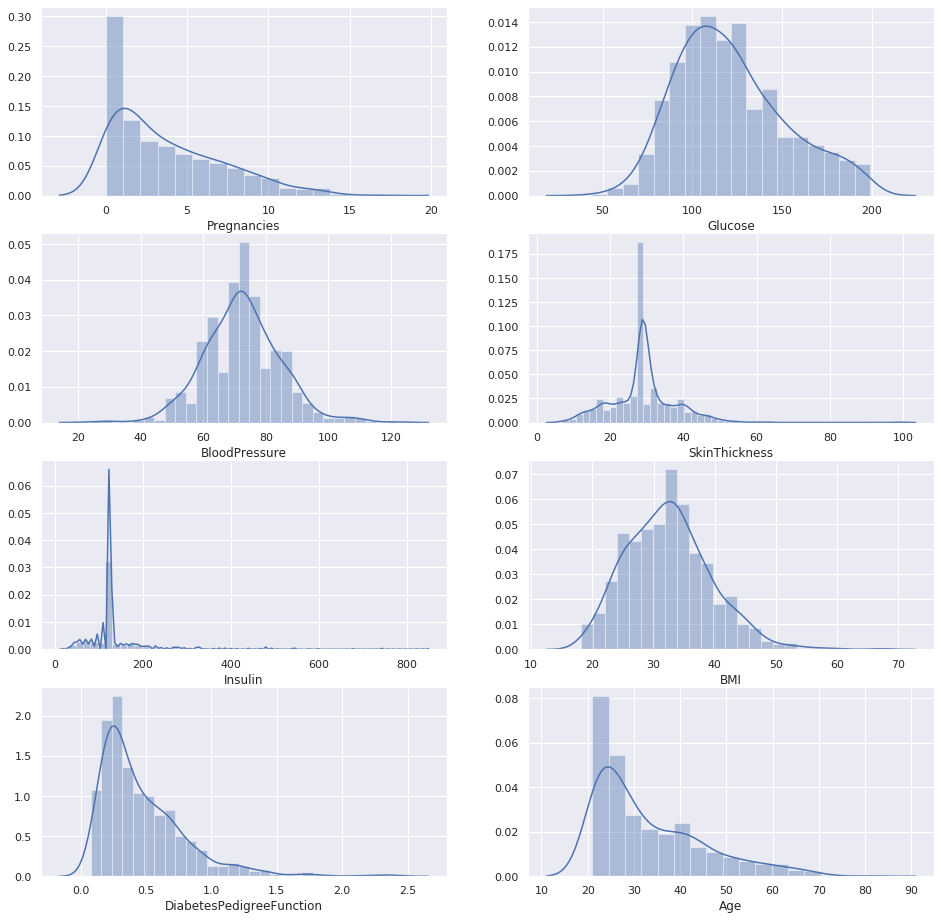

In [16]:
# Distplot
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(data['Pregnancies'],ax=ax2[0][0])
sns.distplot(data['Glucose'],ax=ax2[0][1])
sns.distplot(data['BloodPressure'],ax=ax2[1][0])
sns.distplot(data['SkinThickness'],ax=ax2[1][1])
sns.distplot(data['Insulin'],ax=ax2[2][0])
sns.distplot(data['BMI'],ax=ax2[2][1])
sns.distplot(data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(data['Age'],ax=ax2[3][1])

The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed

/home/spknnk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/spknnk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


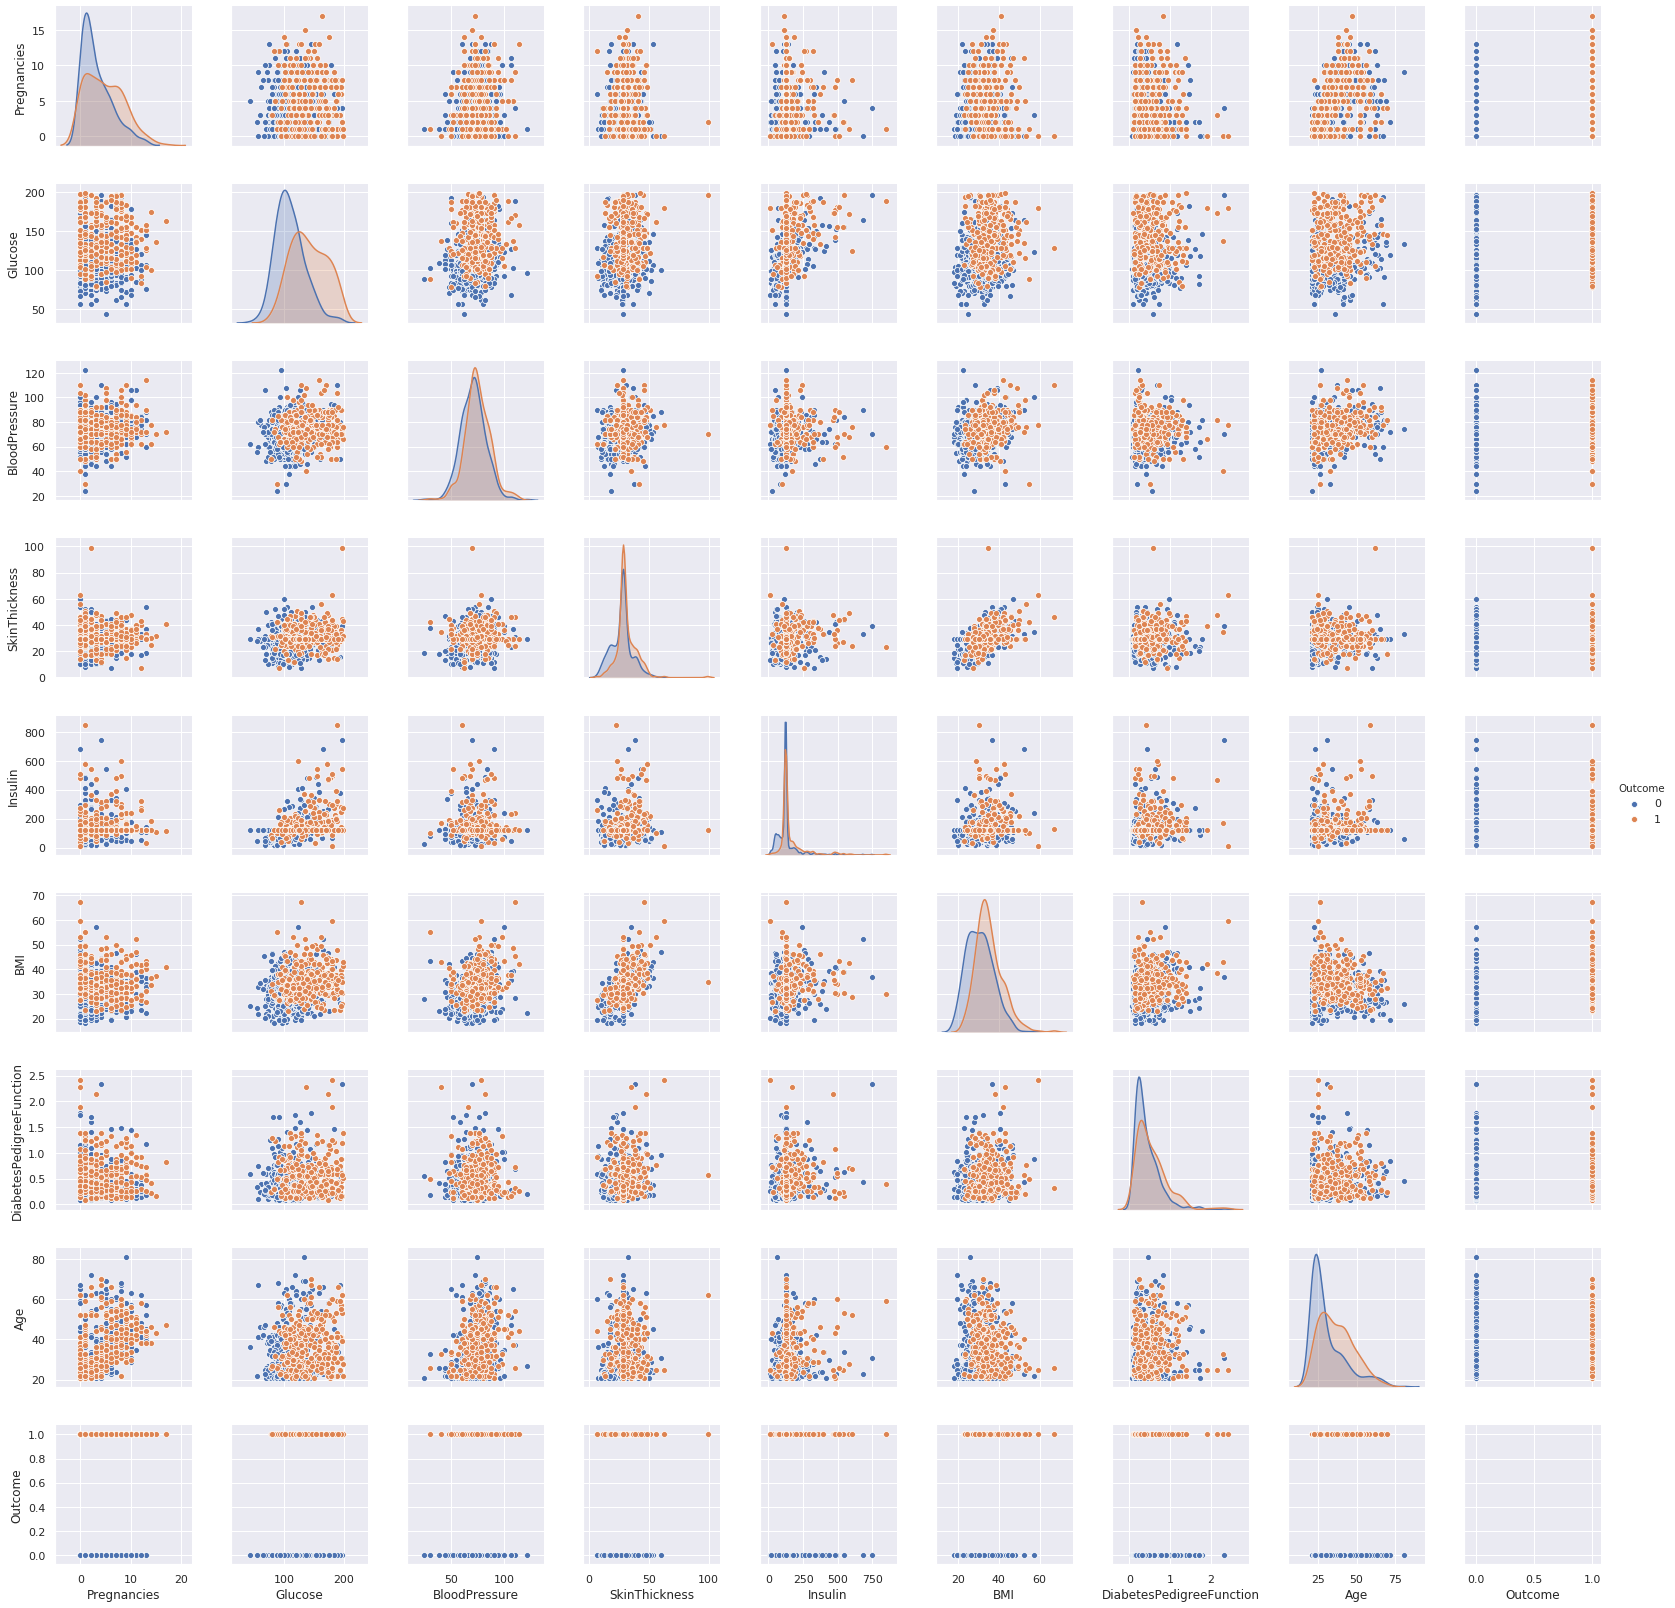

In [17]:
sns.pairplot(data, hue='Outcome')

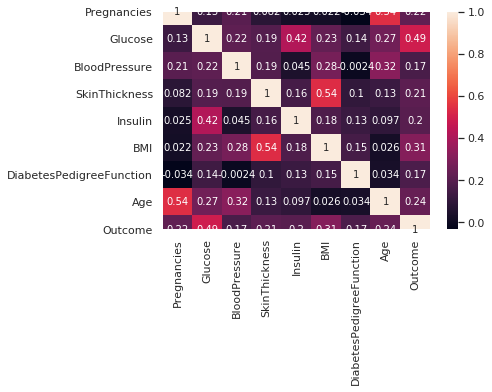

In [18]:
sns.heatmap(data.corr(),annot=True)

In [23]:
from sklearn.preprocessing import StandardScaler
X =  pd.DataFrame(StandardScaler().fit_transform(data.drop(["Outcome"],axis = 1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


# Lab 2

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from ml_algos import *

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [25]:
def cv(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, random_state=16, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        scores[i] = accuracy_score(y_val, y_pred)
    return scores

In [26]:
%%time
model = LogisticRegression()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7734657499363381
CPU times: user 23.7 ms, sys: 3.6 ms, total: 27.3 ms
Wall time: 26.3 ms


In [27]:
%%time
model = LR()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7721670486376369
CPU times: user 550 ms, sys: 3.53 ms, total: 553 ms
Wall time: 553 ms


In [28]:
%%time
model = KNeighborsClassifier(n_neighbors=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7330956625074272
CPU times: user 48.1 ms, sys: 0 ns, total: 48.1 ms
Wall time: 47.3 ms


In [29]:
%%time
model = KNN(nn=5)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7330956625074272
CPU times: user 214 ms, sys: 148 ms, total: 362 ms
Wall time: 115 ms


In [30]:
%%time
model = DecisionTreeClassifier(max_depth=3)
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7513793396146337
CPU times: user 14.9 ms, sys: 3.9 ms, total: 18.8 ms
Wall time: 17.4 ms


In [31]:
%%time
model = DTC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.727900857312622
CPU times: user 141 ms, sys: 3.67 ms, total: 144 ms
Wall time: 144 ms


In [32]:
%%time
model = RandomForestClassifier()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.7435446906035141
CPU times: user 97.1 ms, sys: 0 ns, total: 97.1 ms
Wall time: 96.2 ms


In [33]:
%%time
model = RFC()
scores = cv(model, X, y)
print("Acc: ", scores.mean())

Acc:  0.6172565996095408
CPU times: user 889 ms, sys: 3.67 ms, total: 892 ms
Wall time: 891 ms
